In [1]:
from google.colab import files
uploaded = files.upload()


Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast


In [4]:
df = pd.read_csv("tmdb_5000_movies.csv")
df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
df.isnull().sum()


,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


Data Cleaning

In [9]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


In [10]:
df['year'] = df['release_date'].dt.year


In [11]:
df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())
df['budget'] = df['budget'].fillna(df['budget'].mean())
df['revenue'] = df['revenue'].fillna(df['revenue'].mean())


Extract Genre Column

In [12]:
def extract_genre(genres):
    try:
        return ast.literal_eval(genres)[0]['name']
    except:
        return np.nan

df['genre'] = df['genres'].apply(extract_genre)


Statistical Analysis with NumPy

In [13]:
print("Mean Rating:", np.mean(df['vote_average']))
print("Median Rating:", np.median(df['vote_average']))
print("Standard Deviation:", np.std(df['vote_average']))


Mean Rating: 6.092171559442016
Median Rating: 6.2
Standard Deviation: 1.1944877953328144


In [14]:
print("Mean Budget:", np.mean(df['budget']))
print("Mean Revenue:", np.mean(df['revenue']))


Mean Budget: 29045039.87528628
Mean Revenue: 82260638.65167603


Grouped Analysis with Pandas

In [15]:
genre_avg = df.groupby('genre')['vote_average'].mean().sort_values(ascending=False)
genre_avg


,vote_average
genre,
Foreign,7.200000
History,6.628000
War,6.595833
Drama,6.430240
Crime,6.428718
Western,6.414815
Adventure,6.305605
Animation,6.273984
Music,6.252941


In [16]:
year_avg = df.groupby('year')['vote_average'].mean()
year_avg


,vote_average
year,
1916.0,7.400000
1925.0,7.000000
1927.0,8.000000
1929.0,6.300000
1930.0,6.100000
...,...
2013.0,6.089177
2014.0,5.578992
2015.0,5.593981


Visualizations with Matplotlib

Bar Plot – Average Rating by Genre

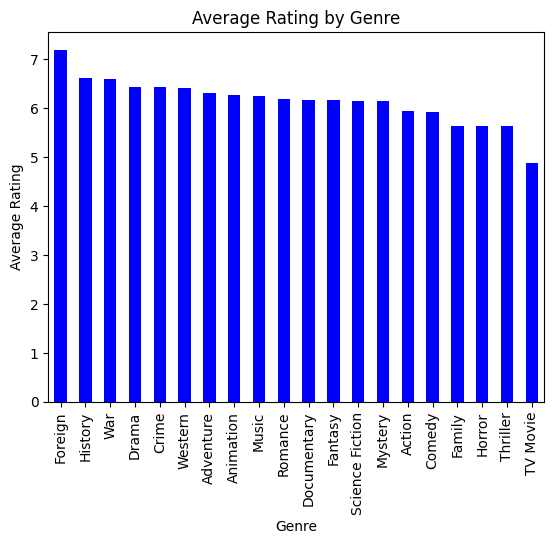

In [18]:
plt.figure()
genre_avg.plot(kind='bar',color='blue')
plt.title("Average Rating by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.show()


Line Plot – Rating Trend Over Years

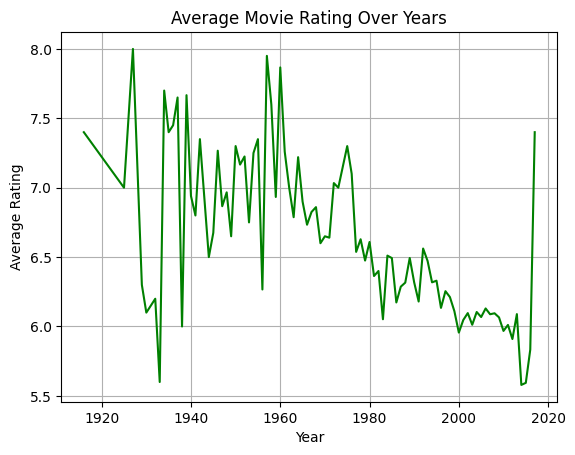

In [20]:
plt.figure()
plt.plot(year_avg.index, year_avg.values,color='green')
plt.title("Average Movie Rating Over Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid()
plt.show()


Scatter Plot – Budget vs Rating

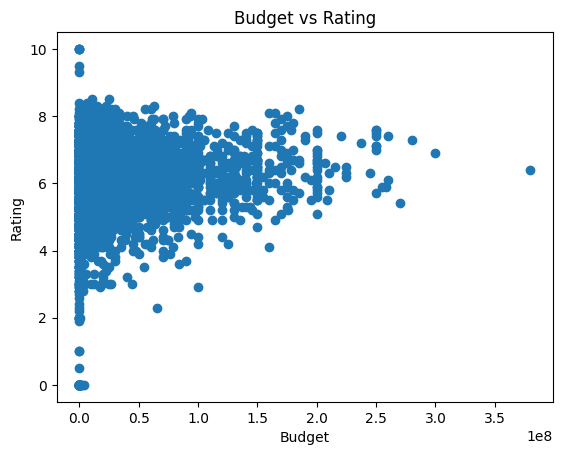

In [22]:
plt.figure()
plt.scatter(df['budget'], df['vote_average'])
plt.title("Budget vs Rating")
plt.xlabel("Budget")
plt.ylabel("Rating")
plt.show()


Scatter Plot – Revenue vs Rating

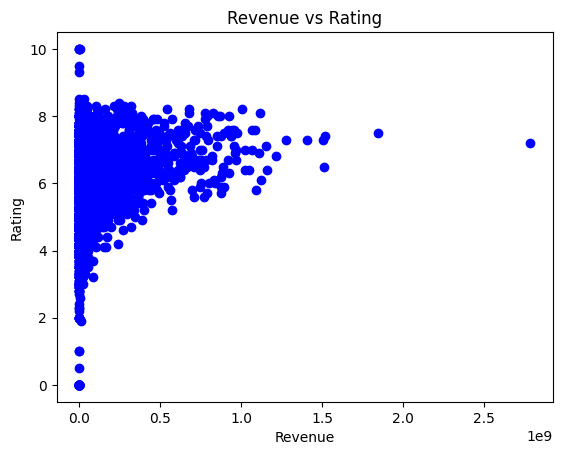

In [23]:
plt.figure()
plt.scatter(df['revenue'], df['vote_average'],color='blue')
plt.title("Revenue vs Rating")
plt.xlabel("Revenue")
plt.ylabel("Rating")
plt.show()


Horizontal Bar Plot – Top Rated Movies

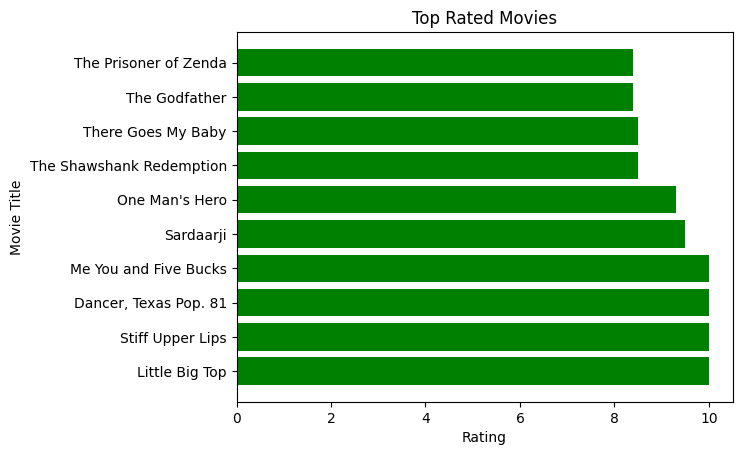

In [25]:
top_movies = df.sort_values(by='vote_average', ascending=False).head(10)

plt.figure()
plt.barh(top_movies['title'], top_movies['vote_average'],color='green')
plt.title("Top Rated Movies")
plt.xlabel("Rating")
plt.ylabel("Movie Title")
plt.show()


Conclusion

## Conclusion

This project analyzed a movie dataset using Pandas, NumPy, and Matplotlib.
Statistical analysis provided insights into movie ratings, budgets, and revenues.
Grouped analysis revealed trends across genres and release years.
Visualizations helped understand relationships between budget, revenue, and ratings.
